# <center>Кластеризация</center>
>Кластеризация позволяет разбить объекты на группы, которые называются **кластерами**.

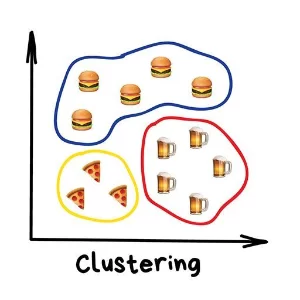

>**Центроид** — это центр масс кластера, или среднее значение координат объектов кластера.

На рисунке ниже изображено три кластера, крестик в каждом из них — это центроид:

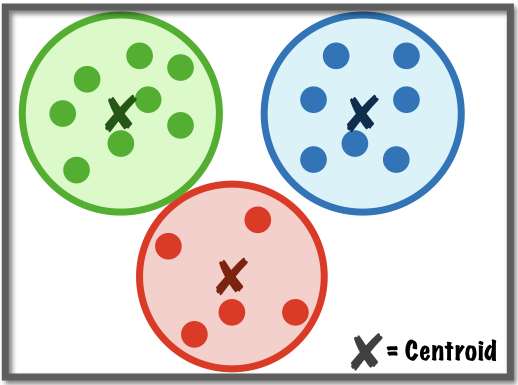

Допустим, у нас есть маленький кластер, состоящий из четырёх точек. Каждая точка описывается только одним свойством — $x_1$, рост человека. Тогда для нахождения центроида мы берём все значения по оси $x$ и считаем среднее.

Что делать, если данные описываются двумя свойствами, например, рост $(x_1)$ и вес $(x_2)$? Тогда у этих точек есть $x_1$- и $x_2$-координаты:

|             | $x_1$, рост  | $x_2$, вес  |
|     ---     |     ----     |     ---     |
| Человек №1  | 180          | 70          |
| Человек №2  | 170          | 60          |
| Человек №3  | 181          | 65          |
| Человек №4  | 160          | 45          |

Для нахождения координат центроида мы последовательно находим:
* Координату $x_1 : x_1(центроид) = (180+170+181+160)/4 = 172$
* Координату $x_2 : x_2(центроид) = (70+60+65+45)/4 = 60$

Таким образом, координаты центроида — (172, 60).

Если объект описывается бόльшим количеством признаков (например, рост $(x_1)$, вес $(x_2)$, объём талии $(x_3)$ и т. д.), то для нахождения координат центроида мы последовательно, по каждому признаку (координате), ищем среднее значение.



## <center>Алгоритм k-means</center>
>**Идея алгоритма** состоит в том, что он разбивает множество элементов векторного пространства на заранее заданное пользователем число кластеров, а далее стремится минимизировать суммарное квадратичное отклонение объектов внутри кластера до центроида кластера.

$$ V = \sum^k_{i=1} \sum_{x \in S_i}(x-\mu_i)^2 $$

Мы итерируемся по каждому кластеру и для всех векторов $x$ внутри кластера $S_i$ подсчитываем центроиды $(\mu_i)$. Далее рассчитываем разницу между каждым вектором $x$ кластера $S_i$ и центроидом кластера $S_i$. Необходимо, чтобы это значение, возведённое в квадрат $(V)$, было минимальным для каждого кластера.

Рассмотрим работу данного алгоритма на примере. Допустим, у нас есть данные с разными значениями свойства $x_1$. Эти данные необходимо разделить на кластеры. Нанесём значения свойства $x_1$ на ось $X$:

**Алгоритм k-means состоит из девяти шагов:**
1. Решаем, на сколько кластеров хотим разделить данные. В данном случае у нас будет три кластера. Значит, у алгоритма k-means $k=3$.

    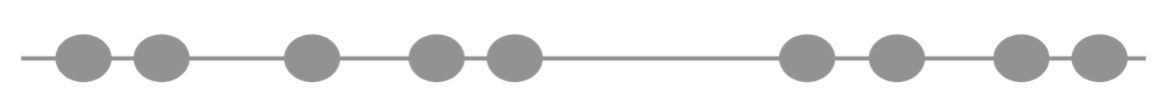

2. Чтобы сформировать кластеры, случайным образом выбираем три объекта из датасета. Эти три объекта будут представлять три разных кластера (жёлтый, розовый и зелёный). Так как в этих кластерах находится по одному объекту, то эти объекты будут считаться исходными центроидами кластеров:

    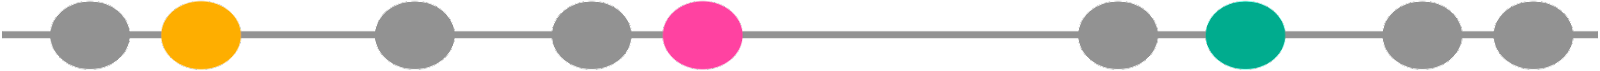

3. Распределим оставшиеся объекты датасета по трём кластерам. Считается, что объект принадлежит к тому кластеру, к центроиду которого он находится ближе всего.

    Возьмём первый объект датасета и рассчитаем расстояние (L1, L2 и L3) от этого объекта до центроида каждого кластера:

    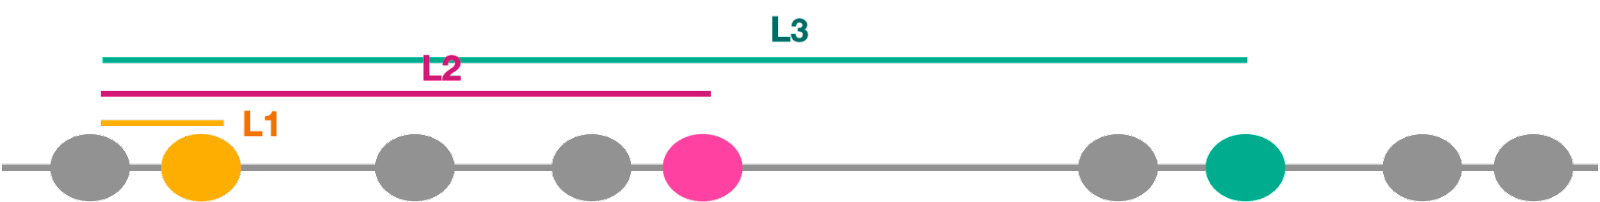

    Найдём, к какому центроиду данный объект находится ближе всего. L1 имеет наименьшее значение — значит, объект располагается ближе всего к центроиду жёлтого кластера и будет отнесён к нему:

    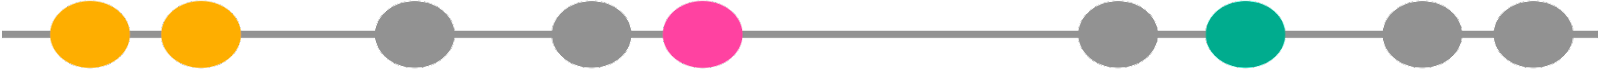

    После этого такую же процедуру мы проводим для остальных объектов датасета. В итоге получаем следующее распределение данных:

    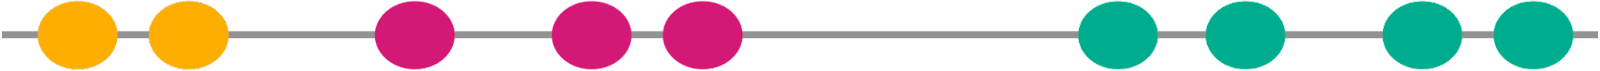

4. Теперь в каждом из кластеров больше одного объекта, и центр этих кластеров тоже изменился. Поэтому рассчитаем новые центроиды и для удобства выделим их на рисунке вертикальной линией:

    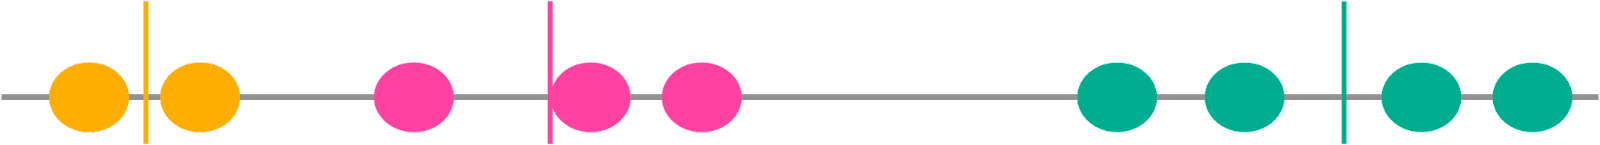

5. После этого для каждого объекта в выборке повторяем шаг 3, т. е. для каждого объекта датасета рассчитываем расстояние до центроидов:

    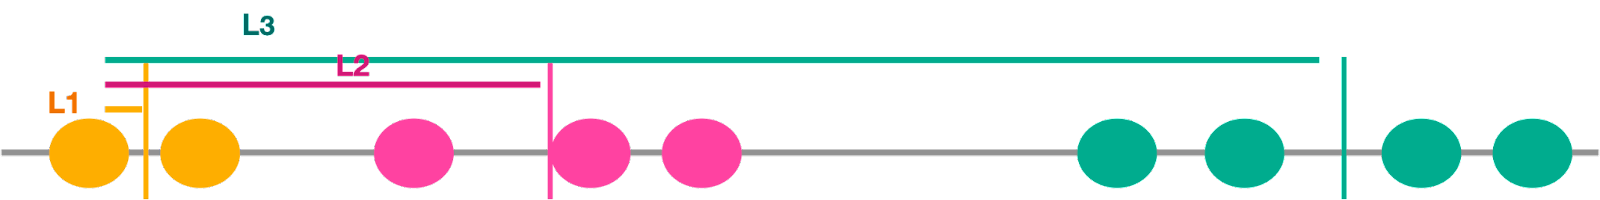

    Так как у нас новые кластеры, центроиды могли сильно измениться. Поэтому при подсчёте расстояний ближайшим к объекту может оказаться уже другой центроид. Значит, этот объект будет принадлежать к другому кластеру.

    В нашем случае центроиды изменились несильно, и все объекты остались в своих кластерах.

6. Шаг 5 повторяется до тех пор, пока объекты датасета не перестанут менять кластеры, к которым они относятся. Как только объекты перестают это делать, алгоритм завершается и мы переходим к шагу 7.
7. Далее для каждого кластера подсчитаем среднеквадратичное отклонение объектов кластера до центроида: для каждого кластера считаем сумму квадратов расстояний от элементов кластера до его центроида.

    Находим суммарное отклонение:

    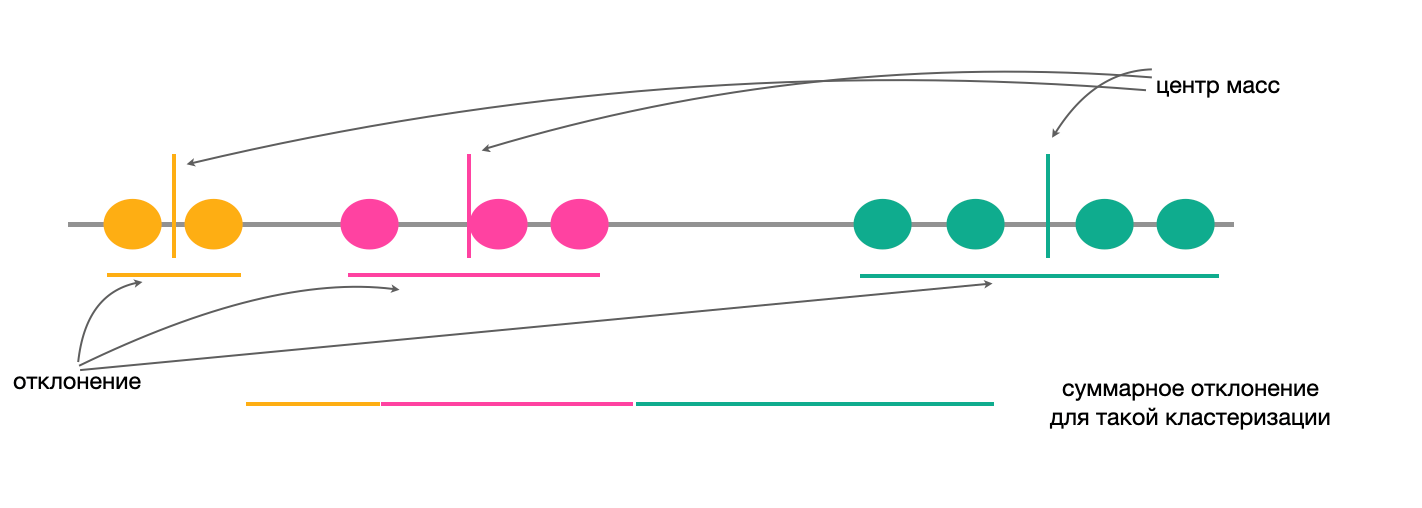
8. Далее мы несколько раз заново запускаем алгоритм кластеризации, начиная с шага 2.

    Зачем это нужно?

    В шаге 1 мы выбирали первые объекты кластера случайным образом, но так можно выбрать не разные объекты, а те, что находятся рядом. В таком случае кластеризация получится некачественной (шесть оставшихся объектов будут принадлежать к зелёному кластеру), как на рисунке ниже:

    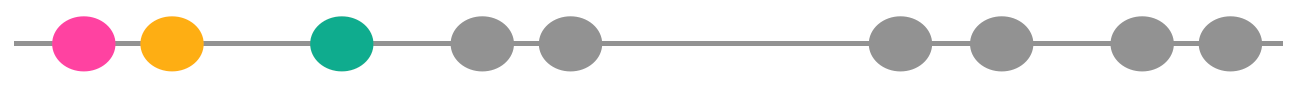

    Чтобы такого не происходило, мы повторяем весь алгоритм несколько раз, начиная с шага 2. В `sklearn` по умолчанию проводится десять итераций.
9. Среди получившихся кластеров нам необходимо найти наилучший вариант кластеризации.

    Лучшей будет признана кластеризация с минимальным значением среднеквадратичного отклонения, которое рассчитывали на шаге 7.

Очевидно, что если все объекты будут в одном кластере, это будет худший сценарий с максимальным среднеквадратичным отклонением:

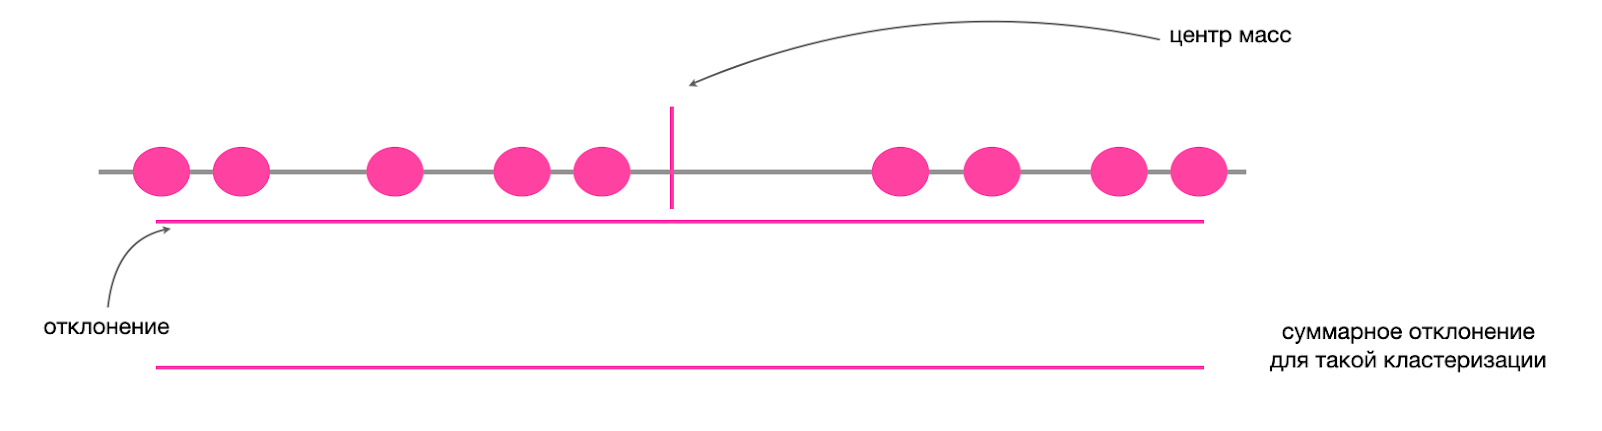

Если каждый объект будет принадлежать собственному кластеру, отклонение будет нулевым, так как один объект будет являться и объектом кластера, и его центром масс, а значит расстояние между объектом кластера и центроидом кластера равно нулю. Такое разбиение будет считаться переобучением, так как мы слишком подстраиваемся под данные:

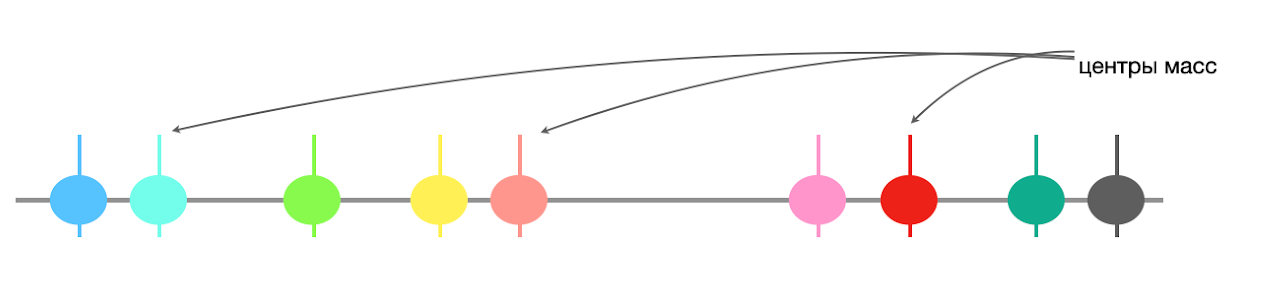

Двумерный случай:

![](https://lms.skillfactory.ru/assets/courseware/v1/e2631c90908fb50354cbb866f2008b92/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-2_37.gif)

На самом деле центры кластера можно определять разными способами. В зависимости от этого выделяется **несколько вариаций алгоритма k-means**:
* **K-MEANS**

Находит центроиды кластера как среднее значение координат.

`init='random'`
* **K-MEANS++**

В классическом алгоритме k-means центроиды выбираются случайно, но это может приводить к тому, что два объекта, которые находятся близко друг к другу, будут центроидами двух разных кластеров — это будет приводить к долгой работе алгоритма.

Алгоритм k-means++ чуть «хитрее» и выбирает центроиды кластеров не совсем случайно.

`init='k-means++'`(используется по-умолчанию)
* **K-MEDIANS**

На этапе поиска центроидов кластера находит не среднее значение координат, а медиану.
* **K-MEDOIDS**

Работает так же, как k-medians, но медианой кластера будет не какая-то точка в кластере, а объект, который находится ближе всего к этим координатам медианы кластера.
* **FUZZY C-MEANS**

Данный алгоритм разрешает нечётко присваивать кластеры. Каждый объект может принадлежать к разным кластерам с разной вероятностью.

`sklearn.cluster.KMeans()`

# <center>Определение оптимального k для алгоритма K-MEANS</center>
## Метод локтя
Данный метод позволяет найти такое оптимальное число кластеров, чтобы добавление ещё одного кластера не приводило к лучшему моделированию данных.

Идея состоит в том, что в самом начале при добавлении новых кластеров качество моделирования улучшается. Эта область называется **недообученной (underfitting)**.

Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, а значит стоит прекратить их добавление. Данная область называется **переобученной (overfitting)**.

Чтобы определить оптимальное количество кластеров, используя метод локтя, необходимо нарисовать график, на котором по оси x будет отложено количество кластеров, а по оси y — инерция.
>**Инерция** — это сумма квадратов расстояний объектов датасета до центра масс ближайшего к ним кластера.

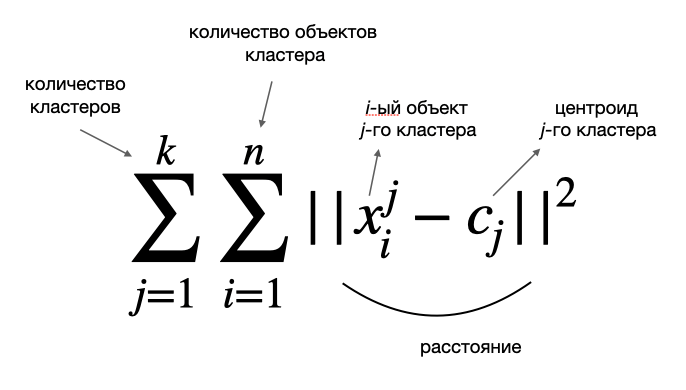

Когда инерция быстро снижается, область считается недообученной, а далее, после «перегиба», идёт очень медленное снижение инерции, и область считается переобученной.

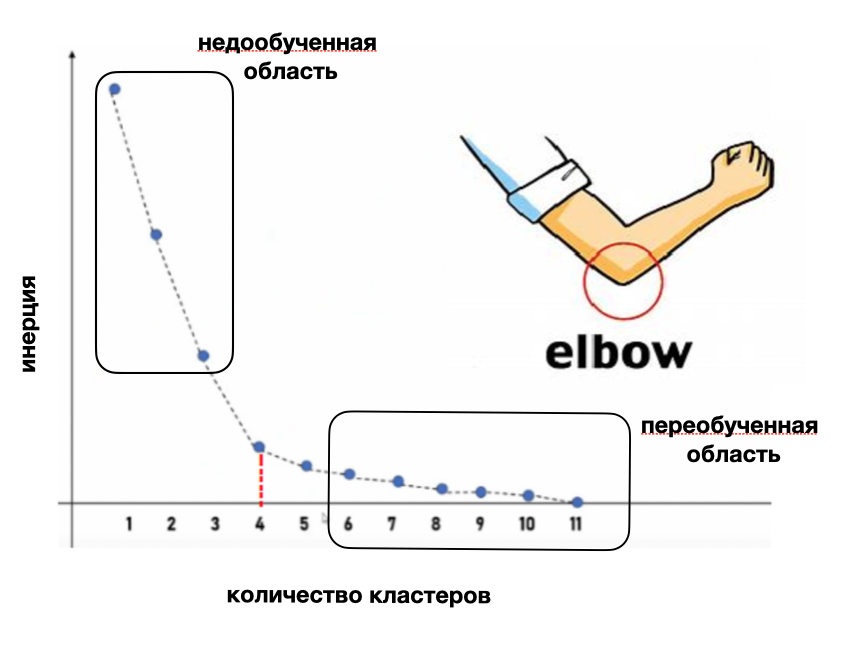

Однако изгиб на графике также может быть представлен нечётко:

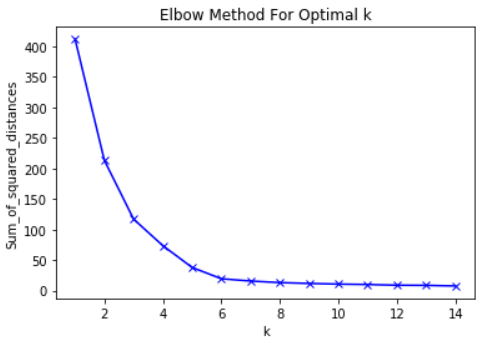

Если вдруг в ходе работы вы встречаете график, на котором невозможно найти «локоть», на помощь придёт **коэффициент силуэта**.

## Коэффициент силуэта

График силуэта, в отличие от графика локтя, имеет пиковый характер, поэтому его проще визуализировать и анализировать.

На графике ниже по оси x отложено количество кластеров, а по оси y — значение коэффициента силуэта. Можно отчётливо увидеть, что пик графика приходится на количество кластеров, равное 3:

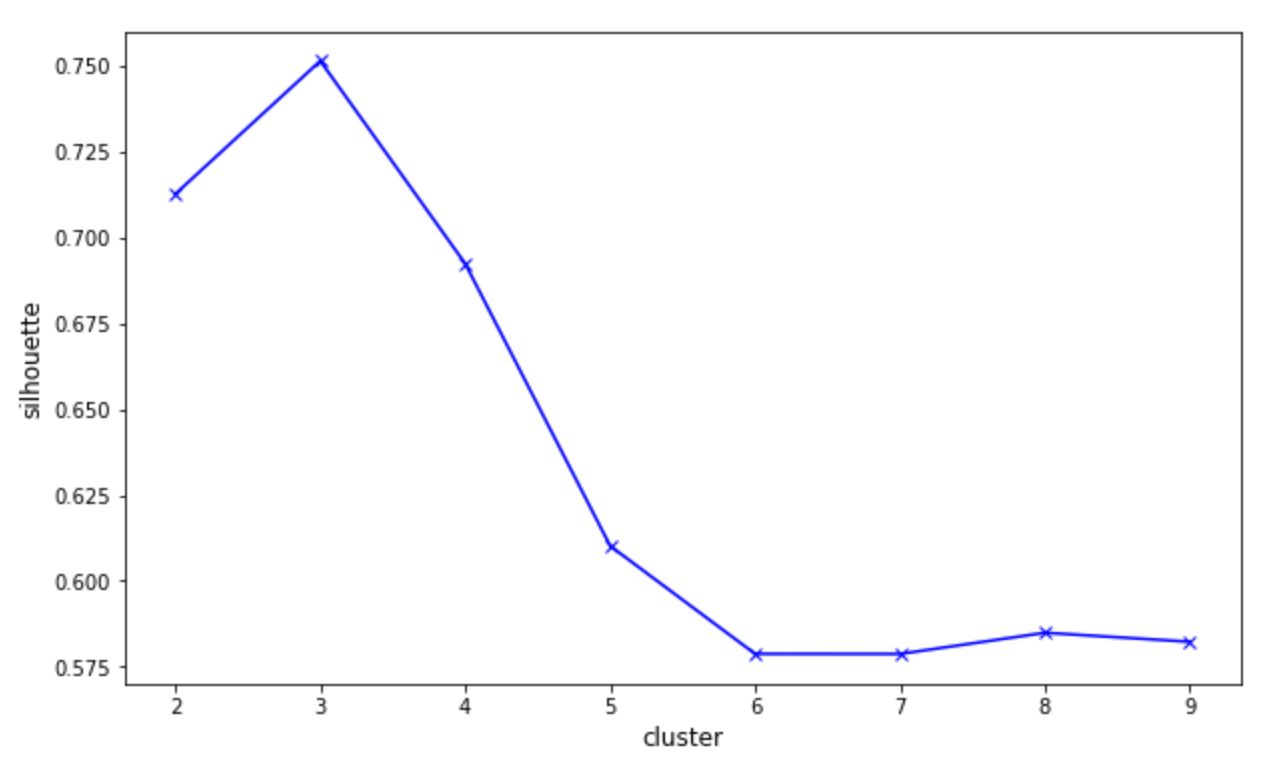
>**Коэффициент силуэта** показывает, насколько объект похож на объекты кластера, в котором он находится, по сравнению с объектами из других кластеров.
Силуэт варьируется от -1 до +1: чем выше значение, тем больше объекты похожи на объекты своего кластера и меньше похожи на объекты соседних кластеров.

Если силуэт равен 1, это означает, что кластеры хорошо разделены между собой и имеют высокую плотность внутри себя, например, такая кластеризация, где данные чётко разделены на три группы:

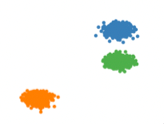

Рассмотрим, как рассчитывается коэффициент силуэта, если у нас есть три разных кластера (красный, зелёный и серый):

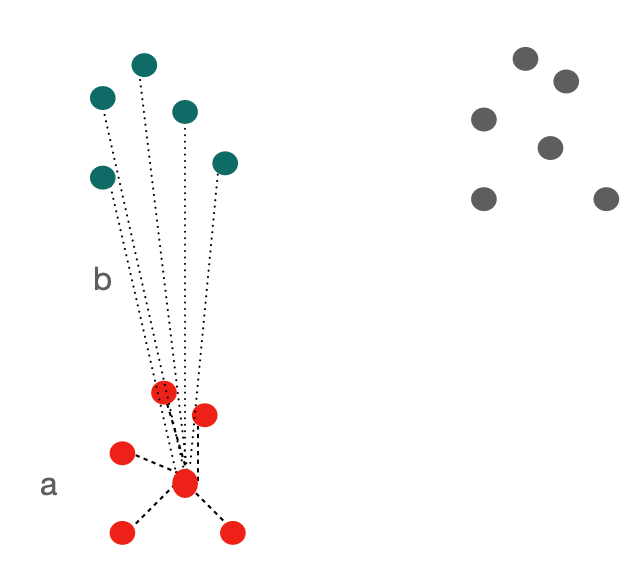

Возьмём красный кластер. Для объекта из красного кластера рассчитаем расстояние до каждого объекта в этом кластере (пусть это будет ). Далее для красного кластера найдём ближайший кластер. Посчитаем расстояние от того же объекта из красного кластера  до каждого объекта зелёного кластера (примем это значение за ).

Для каждой точки датасета рассчитывается значение силуэта:
$$ s_i = \frac{(b_i - a_i)}{\max(a_i,b_i)} $$

>Если вам нужно найти оптимальное количество кластеров для датасета, наиболее наглядным графиком будет график коэффициента силуэта, поэтому можно сразу воспользоваться им. Но стоит помнить, что для построения данного графика нужно **минимум два кластера**, так как мы сравниваем объекты одного кластера с другим, наиболее близким кластером.

